Data preparation complete. Generating plots...


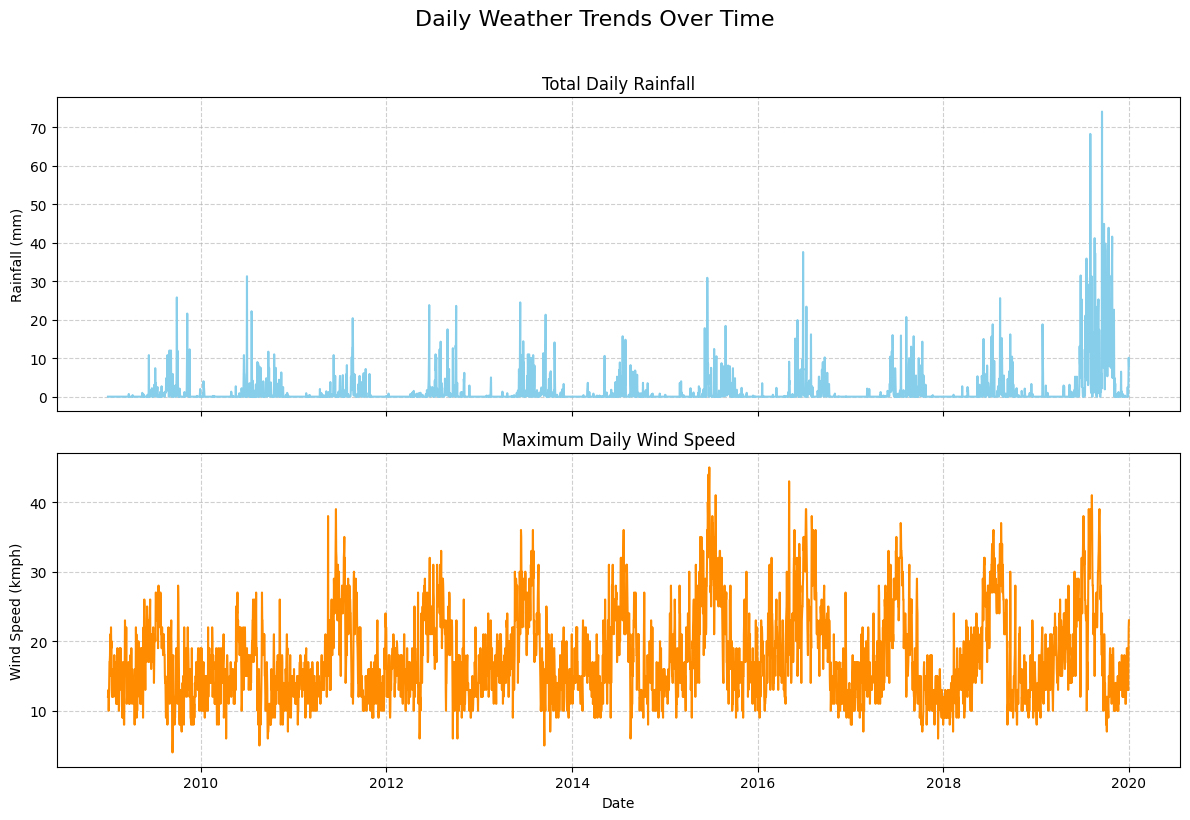

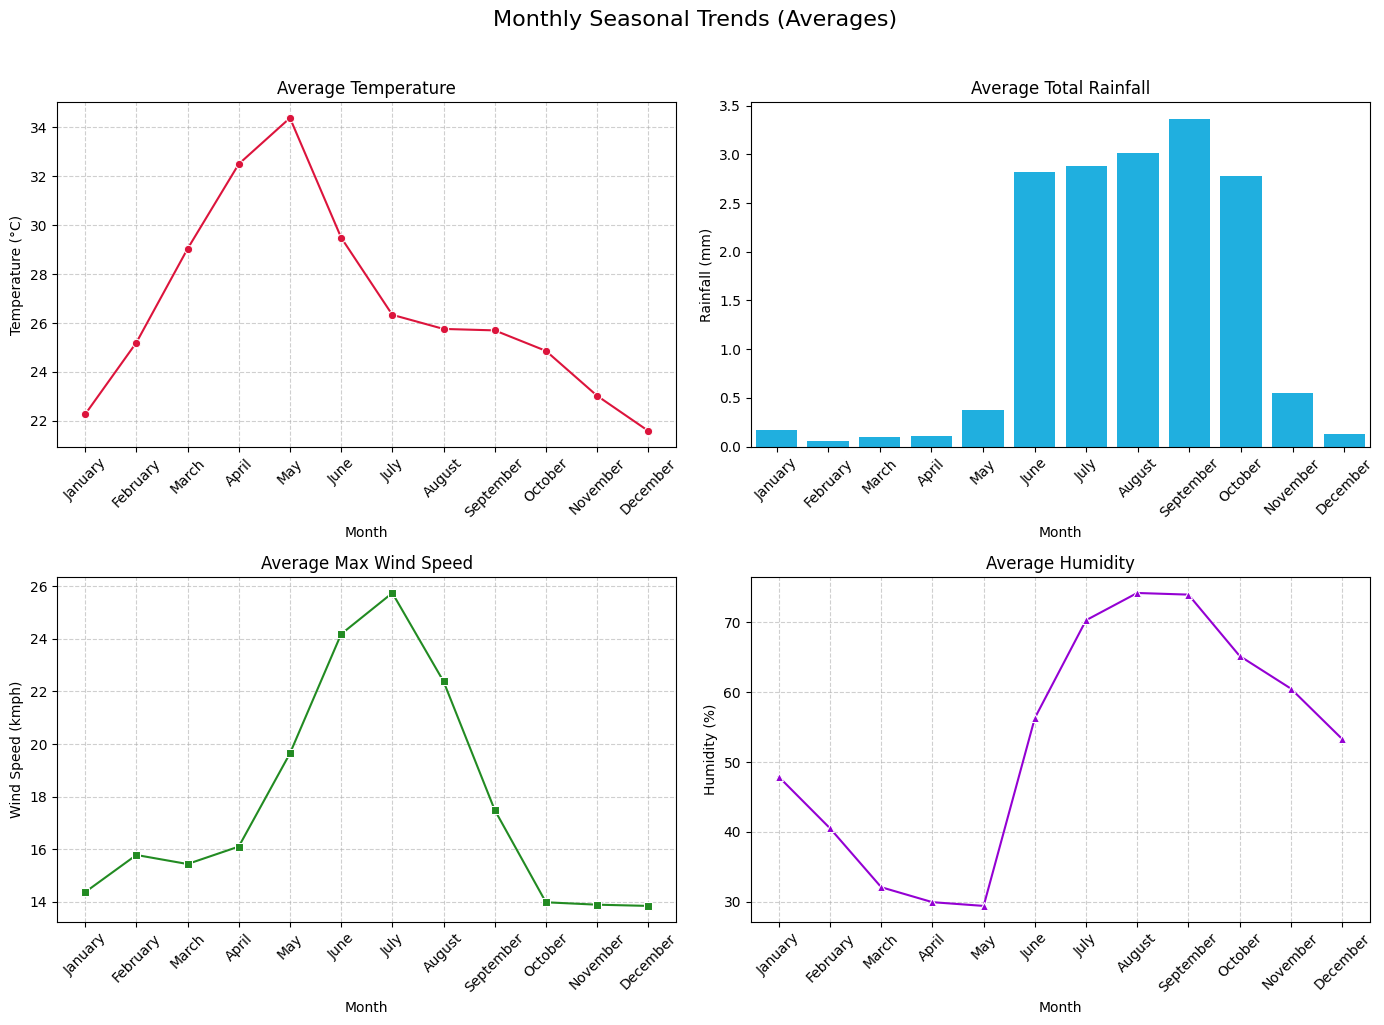

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# --- Data Preparation ---
file_path = 'hyderabad.csv'
df_raw = pd.read_csv(file_path)

df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])
df_raw = df_raw.set_index('date_time')
df = df_raw[['tempC', 'precipMM', 'windspeedKmph', 'humidity']].copy()
df.columns = ['Temperature (°C)', 'Rainfall (mm)', 'Wind Speed (kmph)', 'Humidity (%)']

# Aggregation to Daily Metrics
df_daily = pd.DataFrame({
    'Avg Temp (°C)': df['Temperature (°C)'].resample('D').mean(),
    'Total Rainfall (mm)': df['Rainfall (mm)'].resample('D').sum(),
    'Max Wind Speed (kmph)': df['Wind Speed (kmph)'].resample('D').max(),
    'Avg Humidity (%)': df['Humidity (%)'].resample('D').mean()
}).dropna()

# Monthly Aggregation
df_monthly = df_daily.groupby(df_daily.index.month).mean()
df_monthly.index = [calendar.month_name[i] for i in df_monthly.index]
df_monthly.index.name = 'Month'

print("Data preparation complete. Generating plots...")


# --- 1. Daily Trends Visualization (Rainfall and Wind Speed) ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
plt.suptitle('Daily Weather Trends Over Time', fontsize=16, y=1.02)

sns.lineplot(data=df_daily, x=df_daily.index, y='Total Rainfall (mm)', ax=axes[0], color='skyblue')
axes[0].set_title('Total Daily Rainfall')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].grid(True, linestyle='--', alpha=0.6)

sns.lineplot(data=df_daily, x=df_daily.index, y='Max Wind Speed (kmph)', ax=axes[1], color='darkorange')
axes[1].set_title('Maximum Daily Wind Speed')
axes[1].set_ylabel('Wind Speed (kmph)')
axes[1].set_xlabel('Date')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('daily_trends_rainfall_wind.png')
plt.show() 


# --- 2. Monthly Seasonal Trends Visualization ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle('Monthly Seasonal Trends (Averages)', fontsize=16, y=1.02)

# Plot A: Temperature
sns.lineplot(data=df_monthly, x=df_monthly.index, y='Avg Temp (°C)', ax=axes[0, 0], marker='o', color='crimson')
axes[0, 0].set_title('Average Temperature')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# Plot B: Rainfall
sns.barplot(data=df_monthly, x=df_monthly.index, y='Total Rainfall (mm)', ax=axes[0, 1], color='deepskyblue')
axes[0, 1].set_title('Average Total Rainfall')
axes[0, 1].set_ylabel('Rainfall (mm)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot C: Wind Speed
sns.lineplot(data=df_monthly, x=df_monthly.index, y='Max Wind Speed (kmph)', ax=axes[1, 0], marker='s', color='forestgreen')
axes[1, 0].set_title('Average Max Wind Speed')
axes[1, 0].set_ylabel('Wind Speed (kmph)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# Plot D: Humidity
sns.lineplot(data=df_monthly, x=df_monthly.index, y='Avg Humidity (%)', ax=axes[1, 1], marker='^', color='darkviolet')
axes[1, 1].set_title('Average Humidity')
axes[1, 1].set_ylabel('Humidity (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('monthly_seasonal_trends.png')
plt.show()
